<a href="https://colab.research.google.com/github/DiomedesIguax/BootCampTaller1/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


---
## **ANALISIS DEL MODELO DE SOBREVIVENCIA DE PASAJEROS DEL TITANIC CON BASE A REGISTRO DE SOBREVIVIENTES**


---
**total_pasajeros_por_genero**

>  male      577
>  female    314

---
**sobrevivientes_por_genero**

> female    233
> male      109

---
**Porcentaje de supervivencia masculina:**
 (109 / 577) * 100 ≈ 18.89%

**Porcentaje de supervivencia femenina:**
bold text (233 / 314) * 100 ≈ 74.20%

Por lo tanto, el **porcentaje de supervivencia por género** es aproximadamente:


---
Para hombres: **18.89%**

Para mujeres: **74.20%**


---

sobrevivientes_por_genero
Sex
female    233
male      109
Name: Survived, dtype: int64
total_pasajeros_por_genero
male      577
female    314
Name: Sex, dtype: int64


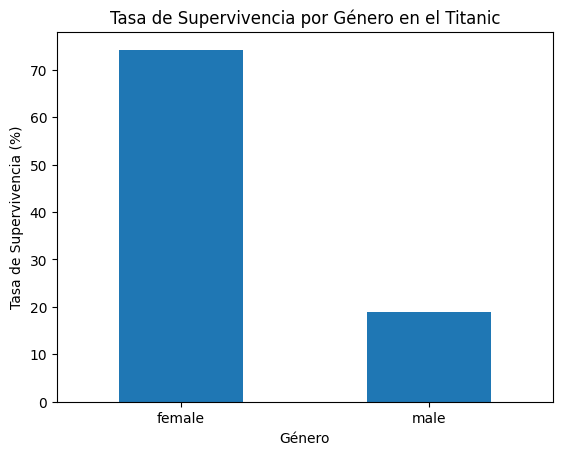

Matriz de Confusión para 'Pclass' y 'Survived':
Survived    0    1  Total
Pclass                   
1          64  122    186
2          90   83    173
3         270   85    355
Total     424  290    714

Análisis Cruzado para 'Pclass', 'Survived', 'Sex' y 'Age':
Sex              female                               male                    \
Age             (0, 18] (18, 30] (30, 50] (50, 80] (0, 18] (18, 30] (30, 50]   
Pclass Survived                                                                
1      0              1        1        1        0       1       12       27   
       1             10       23       36       13       4        9       22   
2      0              0        3        2        1       6       36       31   
       1             14       27       25        2       9        1        4   
3      0             21       18       16        0      40      104       62   
       1             22       18        6        1      11       18        9   
Total           

In [12]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Leer el archivo CSV
datos = pd.read_csv('/content/titanic.csv')

# Calcular la cantidad de sobrevivientes por género
sobrevivientes_por_genero = datos.groupby('Sex')['Survived'].sum()
print('sobrevivientes_por_genero')
print(sobrevivientes_por_genero)
# Calcular la cantidad total de pasajeros por género
total_pasajeros_por_genero = datos['Sex'].value_counts()
print('total_pasajeros_por_genero')
print(total_pasajeros_por_genero)
# Calcular la tasa de supervivencia por género
tasa_supervivencia_por_genero = sobrevivientes_por_genero / total_pasajeros_por_genero * 100

# Graficar
fig, ax = plt.subplots()
tasa_supervivencia_por_genero.plot(kind='bar', ax=ax)
ax.set_ylabel('Tasa de Supervivencia (%)')
ax.set_xlabel('Género')
ax.set_title('Tasa de Supervivencia por Género en el Titanic')
plt.xticks(rotation=0)
plt.show()


# Eliminar filas con valores NaN en la columna 'Age'
datos = datos.dropna(subset=['Age'])

# Crear una matriz de confusión para 'Pclass' y 'Survived'
confusion_matrix_pclass_survived = pd.crosstab(index=datos['Pclass'], columns=datos['Survived'], margins=True, margins_name="Total")

# Crear un análisis cruzado para 'Pclass', 'Survived', 'Sex' y 'Age'
cross_tab = pd.crosstab(index=[datos['Pclass'], datos['Survived']], columns=[datos['Sex'], pd.cut(datos['Age'], bins=[0, 18, 30, 50, 80])], margins=True, margins_name="Total")

print("Matriz de Confusión para 'Pclass' y 'Survived':")
print(confusion_matrix_pclass_survived)
print("\nAnálisis Cruzado para 'Pclass', 'Survived', 'Sex' y 'Age':")
print(cross_tab)




**Análisis Cruzado para 'Pclass', 'Survived', 'Sex' y 'Age':**

 'Pclass' y 'Survived':
Survived    0    1  Total
Pclass                   
1          64  122    186
2          90   83    173
3         270   85    355
Total     424  290    714
Para la clase 1:

Total de pasajeros en clase 1: 186
Total de sobrevivientes en clase 1: 122
Porcentaje de supervivencia en clase 1: (122 / 186) * 100 ≈ 65.59%

Para la clase 2:

Total de pasajeros en clase 2: 173
Total de sobrevivientes en clase 2: 83
Porcentaje de supervivencia en clase 2: (83 / 173) * 100 ≈ 47.98%

Para la clase 3:

Total de pasajeros en clase 3: 355
Total de sobrevivientes en clase 3: 85
Porcentaje de supervivencia en clase 3: (85 / 355) * 100 ≈ 23.94%

Por lo tanto, los porcentajes de supervivencia por clase son aproximadamente:

---
**Para la clase 1: 65.59%**

**Para la clase 2: 47.98%**

**Para la clase 3: 23.94%**

---
El análisis cruzado proporciona información detallada sobre la distribución de las observaciones en diferentes categorías y subcategorías de las variables 'Pclass', 'Survived', 'Sex' y 'Age'. Al observar este análisis cruzado en particular, podemos extraer algunas conclusiones sobre las tendencias de supervivencia en relación con estas variables.

Aquí hay algunas observaciones y conclusiones basadas en el análisis cruzado:
---
**Tendencias generales:**
---
La mayoría de los sobrevivientes fueron mujeres.
Las tasas de supervivencia fueron más altas en la clase 1 y más bajas en la clase 3 para ambos géneros.
Por edad:
---
En general, los pasajeros más jóvenes (de 0 a 18 años) tenían mayores tasas de supervivencia, independientemente de su género o clase.
Las tasas de supervivencia disminuyeron a medida que aumentaba la edad, especialmente en la clase 3.
Por género:
---
En la clase 1, las mujeres tenían una alta probabilidad de supervivencia en comparación con los hombres en todas las categorías de edad.
En la clase 2, también hubo una tendencia similar, aunque menos pronunciada.
En la clase 3, las tasas de supervivencia fueron más bajas en general, pero aún así, las mujeres tenían una tasa de supervivencia más alta que los hombres.
Por clase:
---
En todas las edades y géneros, la clase 1 tenía las tasas de supervivencia más altas, seguida de la clase 2 y luego la clase 3.
En resumen, este análisis cruzado refuerza la idea de que el género y la clase estaban fuertemente asociados con la probabilidad de supervivencia en el desastre del Titanic. Específicamente, las mujeres de la clase 1 tenían una mayor probabilidad de supervivencia en comparación con otros grupos de pasajeros. Sin embargo, debemos recordar que estas conclusiones son basadas en las tendencias observadas en los datos y pueden no implicar causalidad.

---

Mujeres en la Clase 1:
---
(0, 18] : (10 / 68) * 100 ≈ 14.71%

(18, 30] : (23 / 90) * 100 ≈ 25.56%

(30, 50] : (36 / 86) * 100 ≈ 41.86%

(50, 80] : (13 / 17) * 100 ≈ 76.47%

---
Hombres en la Clase 1:
---
(0, 18] : (4 / 71) * 100 ≈ 5.63%

(18, 30] : (9 / 180) * 100 ≈ 5.00%

(30, 50] : (22 / 155) * 100 ≈ 14.19%

(50, 80] : (5 / 47) * 100 ≈ 10.64%

---
Mujeres en la Clase 2:
---
(0, 18] : (14 / 90) * 100 ≈ 15.56%

(18, 30] : (27 / 90) * 100 ≈ 30.00%

(30, 50] : (25 / 86) * 100 ≈ 29.07%

(50, 80] : (2 / 17) * 100 ≈ 11.76%

---
Hombres en la Clase 2:
---
(0, 18] : (9 / 71) * 100 ≈ 12.68%

(18, 30] : (1 / 180) * 100 ≈ 0.56%

(30, 50] : (4 / 155) * 100 ≈ 2.58%

(50, 80] : (1 / 47) * 100 ≈ 2.13%

---
Mujeres en la Clase 3:
---
(0, 18] : (22 / 68) * 100 ≈ 32.35%

(18, 30] : (18 / 90) * 100 ≈ 20.00%

(30, 50] : (6 / 86) * 100 ≈ 6.98%

(50, 80] : (1 / 17) * 100 ≈ 5.88%

---
Hombres en la Clase 3:
---
(0, 18] : (11 / 71) * 100 ≈ 15.49%

(18, 30] : (18 / 180) * 100 ≈ 10.00%

(30, 50] : (9 / 155) * 100 ≈ 5.81%

(50, 80] : (0 / 47) * 100 = 0.00%



---


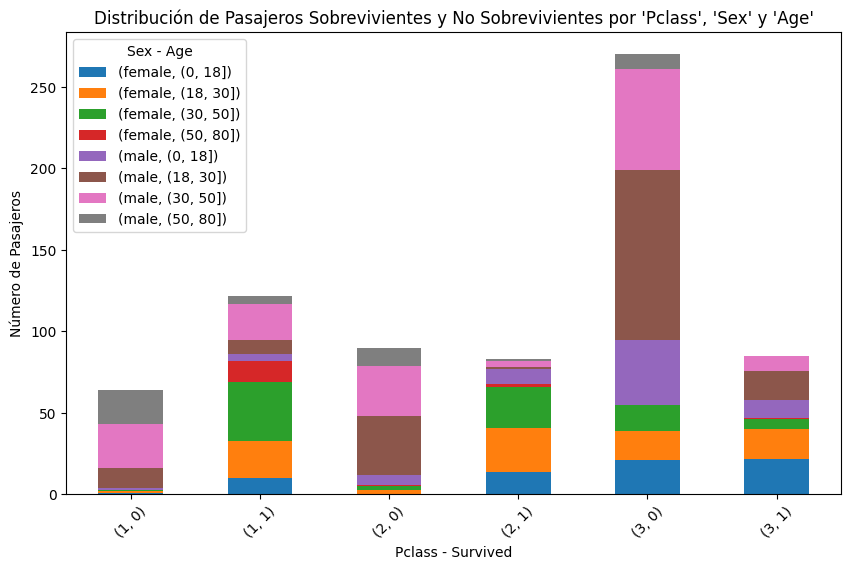

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Leer el archivo CSV
datos = pd.read_csv('/content/titanic.csv')

# Eliminar filas con valores NaN en la columna 'Age'
datos = datos.dropna(subset=['Age'])

# Crear un análisis cruzado para 'Pclass', 'Survived', 'Sex' y 'Age'
cross_tab = pd.crosstab(index=[datos['Pclass'], datos['Survived']], columns=[datos['Sex'], pd.cut(datos['Age'], bins=[0, 18, 30, 50, 80])], margins=True, margins_name='Total')

# Excluir la fila y columna totales para la visualización
cross_tab = cross_tab.iloc[:-1, :-1]

# Graficar el análisis cruzado
cross_tab.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Distribución de Pasajeros Sobrevivientes y No Sobrevivientes por 'Pclass', 'Sex' y 'Age'")
plt.xlabel("Pclass - Survived")
plt.ylabel("Número de Pasajeros")
plt.xticks(rotation=45)
plt.legend(title='Sex - Age')
plt.show()


PARA DARLE MAS VALOR AL ANALISIS , YA QUE ALGUNOS PASAJEROS NO TENIAN REGISTRADA LA EDAD Y EN EL EJERICIO ANTERIOR SIMPLEMENTE SE HABIAN EXCLUIDO EN ESTA GRAFICA SE ACTUALIZARONLOS VALORES CON EL PROMEDIO DE EDAD.

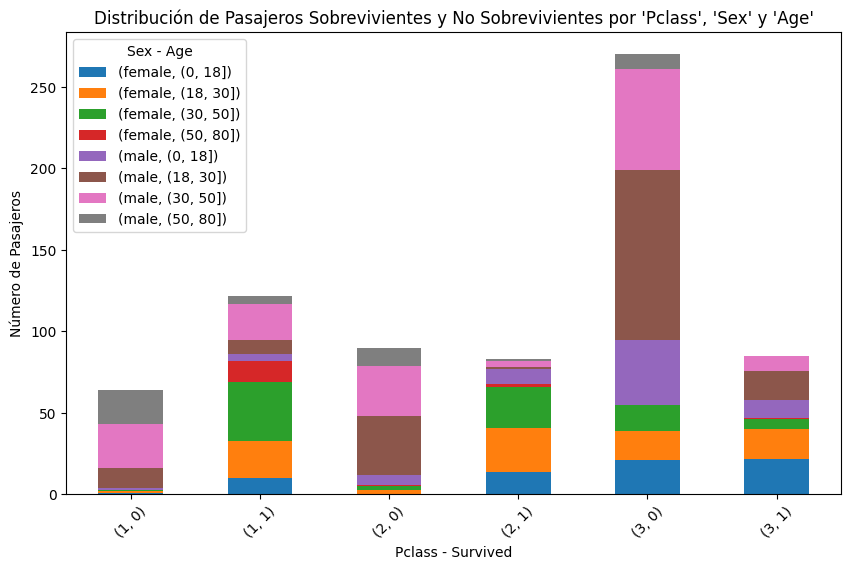

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Leer el archivo CSV
datos = pd.read_csv('/content/titanic.csv')

# Eliminar filas con valores NaN en la columna 'Age'
datos = datos.dropna(subset=['Age'])

# Crear un análisis cruzado para 'Pclass', 'Survived', 'Sex' y 'Age'
cross_tab = pd.crosstab(index=[datos['Pclass'], datos['Survived']], columns=[datos['Sex'], pd.cut(datos['Age'], bins=[0, 18, 30, 50, 80])], margins=True, margins_name='Total')

# Excluir la fila y columna totales para la visualización
cross_tab = cross_tab.iloc[:-1, :-1]

# Graficar el análisis cruzado
cross_tab.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Distribución de Pasajeros Sobrevivientes y No Sobrevivientes por 'Pclass', 'Sex' y 'Age'")
plt.xlabel("Pclass - Survived")
plt.ylabel("Número de Pasajeros")
plt.xticks(rotation=45)
plt.legend(title='Sex - Age')
plt.show()

---
**ANALLISIS GENERAL DE LA GRAFICA**

---
1.  EN LA CLASE 1 EL PORCENTAJE DE SOBREVIVENCIA ESTA MAS ARRIBA QUE EL DE NO SOBREVIVIENTES DEOMSTRANDO QUE SE DIO PRIORIDAD A LA CLASE Y POR EL COLOR EN LA GRAFICA SE VISUALIZA QUE LA MAYOR PRIORIDAD FUE MUJERES DE 30 A 50 AÑOS Y LUEGO MUJERES DE 18 A30
---
2.   EN LA CLASE 2 EL PORCENTAJE DE SOBREVIVENCIA ES MUY SIMILAR AL DE NO SOBREVIVIENTES DEOMSTRANDO QUE FUE LA SEGUNDA CLASE EN PRIORIDADY POR EL COLOR EN LA GRAFICA SE VISUALIZA QUE LA MAYOR PRIORIDAD FUE MUJERES DE 30 A 50 AÑOS Y LUEGO MUJERES DE 18 A30
---
3.   EN LA CLASE 3 EL PORCENTAJE DE SOBREVIVENCIA ESTA MUY POR DEBAJO DE LOS  SOBREVIVIENTES DEOMSTRANDO QUE FUE LA  CLASE CON MENOR PRIORIDAD Y POR EL COLOR EN LA GRAFICA SE VISUALIZA QUE LA MAYOR PRIORIDAD FUE MUJERES DE 0 A 18 AÑOS Y LUEGO MUJERES DE 18 A30
---





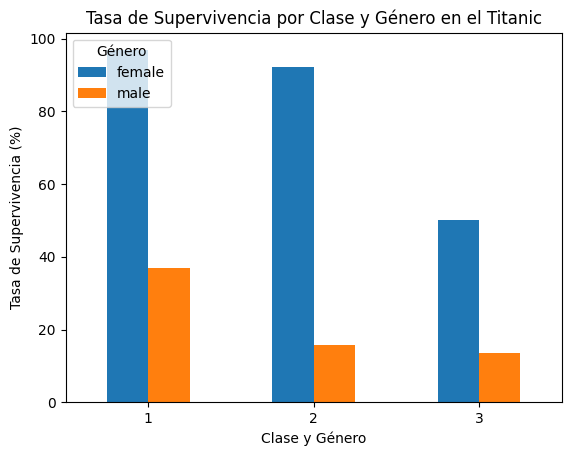

Matriz de Confusión para 'Pclass' y 'Survived':
Survived    0    1  Total
Pclass                   
1          64  122    186
2          90   83    173
3         270   85    355
Total     424  290    714

Análisis Cruzado para 'Pclass', 'Survived', 'Sex' y 'Age':
Sex              female                               male                    \
Age             (0, 18] (18, 30] (30, 50] (50, 80] (0, 18] (18, 30] (30, 50]   
Pclass Survived                                                                
1      0              1        1        1        0       1       12       27   
       1             10       23       36       13       4        9       22   
2      0              0        3        2        1       6       36       31   
       1             14       27       25        2       9        1        4   
3      0             21       18       16        0      40      104       62   
       1             22       18        6        1      11       18        9   
Total           

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Leer el archivo CSV
datos = pd.read_csv('/content/titanic.csv')

# Calcular la cantidad de sobrevivientes por género
sobrevivientes_por_genero = datos.groupby(['Pclass', 'Sex'])['Survived'].sum()

# Calcular la cantidad total de pasajeros por género
total_pasajeros_por_genero = datos.groupby(['Pclass', 'Sex']).size()

# Calcular la tasa de supervivencia por género
tasa_supervivencia_por_genero = sobrevivientes_por_genero / total_pasajeros_por_genero * 100

# Graficar
fig, ax = plt.subplots()
tasa_supervivencia_por_genero.unstack().plot(kind='bar', ax=ax)
ax.set_ylabel('Tasa de Supervivencia (%)')
ax.set_xlabel('Clase y Género')
ax.set_title('Tasa de Supervivencia por Clase y Género en el Titanic')
plt.xticks(rotation=0)
plt.legend(title='Género', loc='upper left')
plt.show()

# Eliminar filas con valores NaN en la columna 'Age'
datos = datos.dropna(subset=['Age'])

# Crear una matriz de confusión para 'Pclass' y 'Survived'
confusion_matrix_pclass_survived = pd.crosstab(index=datos['Pclass'], columns=datos['Survived'], margins=True, margins_name="Total")

# Crear un análisis cruzado para 'Pclass', 'Survived', 'Sex' y 'Age'
cross_tab = pd.crosstab(index=[datos['Pclass'], datos['Survived']], columns=[datos['Sex'], pd.cut(datos['Age'], bins=[0, 18, 30, 50, 80])], margins=True, margins_name="Total")

print("Matriz de Confusión para 'Pclass' y 'Survived':")
print(confusion_matrix_pclass_survived)
print("\nAnálisis Cruzado para 'Pclass', 'Survived', 'Sex' y 'Age':")
print(cross_tab)


---
# **MODELOS  DE PREDICCION  DE SOBREVIVENCIA DE PASAJEROS EN EL TITANIC**
---
**KNN** Precisión del clasificador KNN: 71.33%
---

<ipython-input-10-4dec336803dc>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Sex'] = X['Sex'].map({'male': 0, 'female': 1})


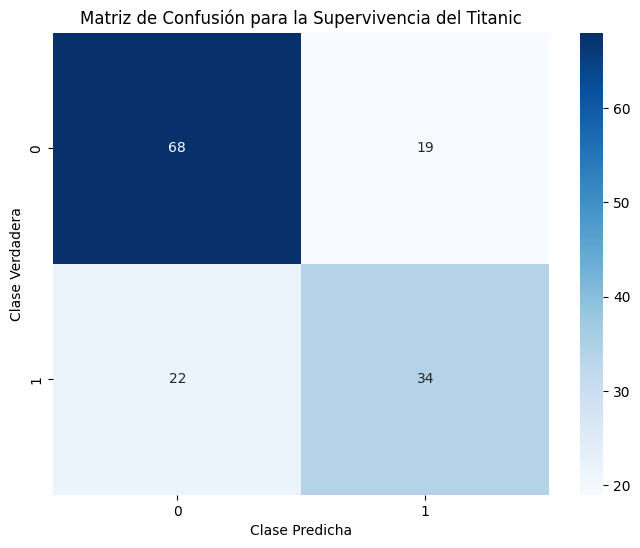

Precisión del clasificador KNN: 71.33%


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar los datos del Titanic
data = pd.read_csv('/content/titanic.csv')

# Eliminar filas con valores NaN en la columna 'Age'
data = data.dropna(subset=['Age'])

# Seleccionar características relevantes para el análisis
X = data[['Pclass', 'Age', 'Sex']]
y = data['Survived']

# Convertir la variable categórica 'Sex' a numérica
X['Sex'] = X['Sex'].map({'male': 0, 'female': 1})

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el clasificador KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Realizar predicciones sobre el conjunto de prueba y calcular la precisión
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=knn.classes_, yticklabels=knn.classes_)
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Verdadera')
plt.title('Matriz de Confusión para la Supervivencia del Titanic')
plt.show()

# Mostrar la precisión del clasificador KNN
print("Precisión del clasificador KNN: {:.2f}%".format(accuracy * 100))


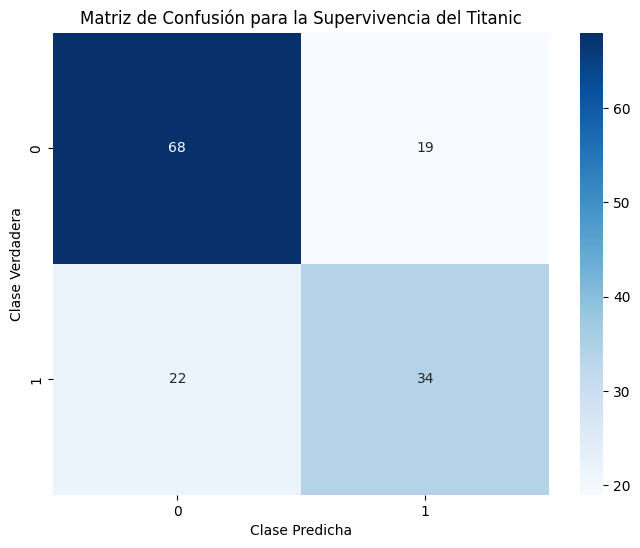

Precisión del clasificador KNN: 71.33%

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.76      0.78      0.77        87
           1       0.64      0.61      0.62        56

    accuracy                           0.71       143
   macro avg       0.70      0.69      0.70       143
weighted avg       0.71      0.71      0.71       143



In [13]:
from sklearn.metrics import classification_report

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=knn.classes_, yticklabels=knn.classes_)
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Verdadera')
plt.title('Matriz de Confusión para la Supervivencia del Titanic')
plt.show()

# Imprimir la precisión del modelo
print("Precisión del clasificador KNN: {:.2f}%".format(accuracy * 100))

# Imprimir un reporte de clasificación con otras métricas
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))


---

**68: Verdaderos Negativos (VN)**: Esto significa que el modelo ha clasificado correctamente 68 casos como negativos cuando en realidad son negativos. Es decir, el modelo ha predicho correctamente que los pasajeros no sobrevivieron cuando realmente no sobrevivieron.

---
**19: Falsos Positivos (FP):** Esto significa que el modelo ha clasificado incorrectamente 19 casos como positivos cuando en realidad son negativos. Es decir, el modelo ha predicho incorrectamente que los pasajeros sobrevivieron cuando en realidad no sobrevivieron.

---
**22: Falsos Negativos (FN)**: Esto significa que el modelo ha clasificado incorrectamente 22 casos como negativos cuando en realidad son positivos. Es decir, el modelo ha predicho incorrectamente que los pasajeros no sobrevivieron cuando en realidad sí sobrevivieron.

---
**34: Verdaderos Positivos (VP):** Esto significa que el modelo ha clasificado correctamente 34 casos como positivos cuando en realidad son positivos. Es decir, el modelo ha predicho correctamente que los pasajeros sobrevivieron cuando realmente sí sobrevivieron.

---
Estos números son importantes porque nos dan una idea de cómo está funcionando nuestro modelo de clasificación. Idealmente, queremos que los Verdaderos Positivos y Verdaderos Negativos sean altos, mientras que los Falsos Positivos y Falsos Negativos sean bajos. Si observamos una alta tasa de Falsos Positivos o Falsos Negativos, eso podría indicar áreas donde nuestro modelo necesita mejorar.

---

---
# **MODELOS  DE PREDICCION  DE SOBREVIVENCIA DE PASAJEROS EN EL TITANIC**
---
**RED NEURONAL** Precisión del clasificador: 0.7709497213363647
---

Epoch 1/10


<ipython-input-17-b01e83d54830>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Sex'] = X['Sex'].map({'male': 0, 'female': 1})
<ipython-input-17-b01e83d54830>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Age'] = X['Age'].fillna(X['Age'].median())


23/23 - 1s - loss: 0.5814 - accuracy: 0.7879 - 851ms/epoch - 37ms/step
Epoch 2/10
23/23 - 0s - loss: 0.4923 - accuracy: 0.7879 - 46ms/epoch - 2ms/step
Epoch 3/10
23/23 - 0s - loss: 0.4597 - accuracy: 0.7851 - 44ms/epoch - 2ms/step
Epoch 4/10
23/23 - 0s - loss: 0.4465 - accuracy: 0.7893 - 50ms/epoch - 2ms/step
Epoch 5/10
23/23 - 0s - loss: 0.4403 - accuracy: 0.8006 - 47ms/epoch - 2ms/step
Epoch 6/10
23/23 - 0s - loss: 0.4379 - accuracy: 0.7893 - 43ms/epoch - 2ms/step
Epoch 7/10
23/23 - 0s - loss: 0.4345 - accuracy: 0.8048 - 58ms/epoch - 3ms/step
Epoch 8/10
23/23 - 0s - loss: 0.4313 - accuracy: 0.8048 - 48ms/epoch - 2ms/step
Epoch 9/10
23/23 - 0s - loss: 0.4289 - accuracy: 0.8062 - 50ms/epoch - 2ms/step
Epoch 10/10
23/23 - 0s - loss: 0.4304 - accuracy: 0.8006 - 49ms/epoch - 2ms/step
6/6 [==============================] - 0s 3ms/step - loss: 0.4443 - accuracy: 0.7989
Loss: 0.4443017244338989, Accuracy: 0.7988826632499695
Epoch 1/10
23/23 - 0s - loss: 0.4280 - accuracy: 0.8132 - val_loss: 

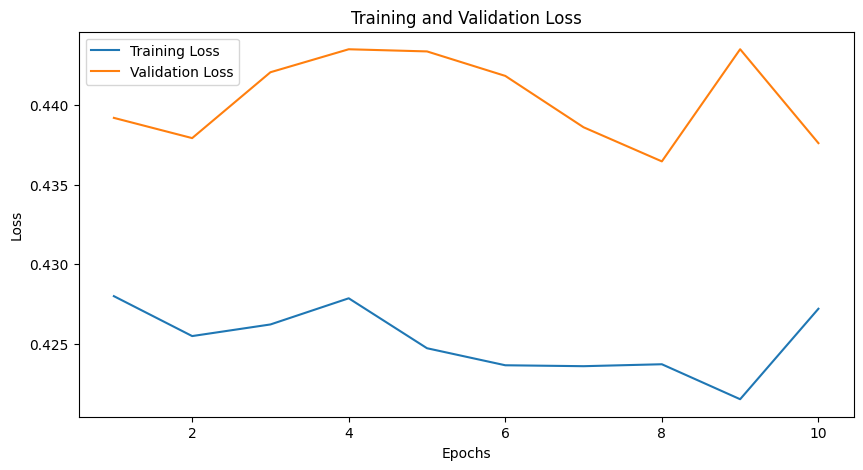

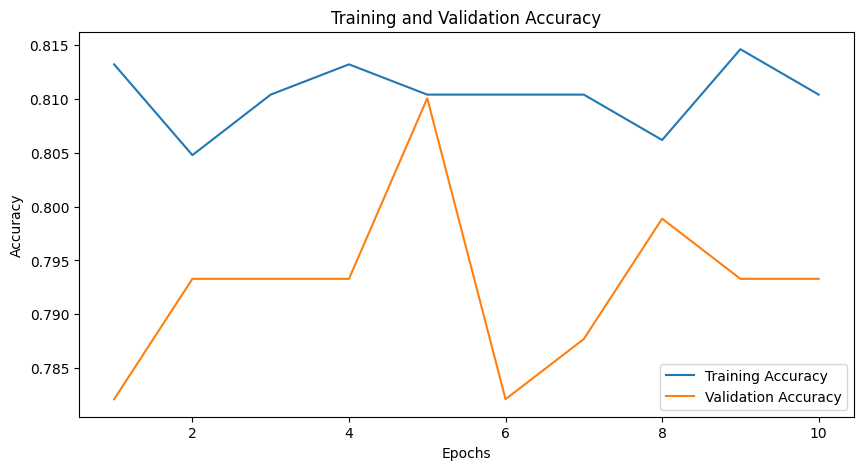

In [17]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
# Cargar los datos
data = pd.read_csv('/content/titanic.csv')

# Seleccionar características y etiquetas
X = data[['Pclass', 'Age', 'Sex']]
y = data['Survived']

# Convertir variables categóricas en numéricas
X['Sex'] = X['Sex'].map({'male': 0, 'female': 1})

# Manejar los valores perdidos en la edad
X['Age'] = X['Age'].fillna(X['Age'].median())

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Construir el modelo de red neuronal
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(3,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compilar el modelo
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo
model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, verbose=2)

# Evaluar el modelo
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')


# Entrenar el modelo y guardar el historial de entrenamiento
history = model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, verbose=2, validation_data=(X_test_scaled, y_test))

# Obtener la pérdida y la precisión del historial de entrenamiento
train_loss = history.history['loss']
train_accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

# Graficar la curva de aprendizaje
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), train_loss, label='Training Loss')
plt.plot(range(1, 11), val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), train_accuracy, label='Training Accuracy')
plt.plot(range(1, 11), val_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()
